# New Section

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read Excel file correctly
df = pd.read_excel('Data_Train.xlsx')

# Show the dataframe
df.head()  # Use .head() instead of just df to avoid messy large output


Saving Data_Train.xlsx to Data_Train.xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
print("Parameter are: ",df.columns)

Parameter are:  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df['Price'].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


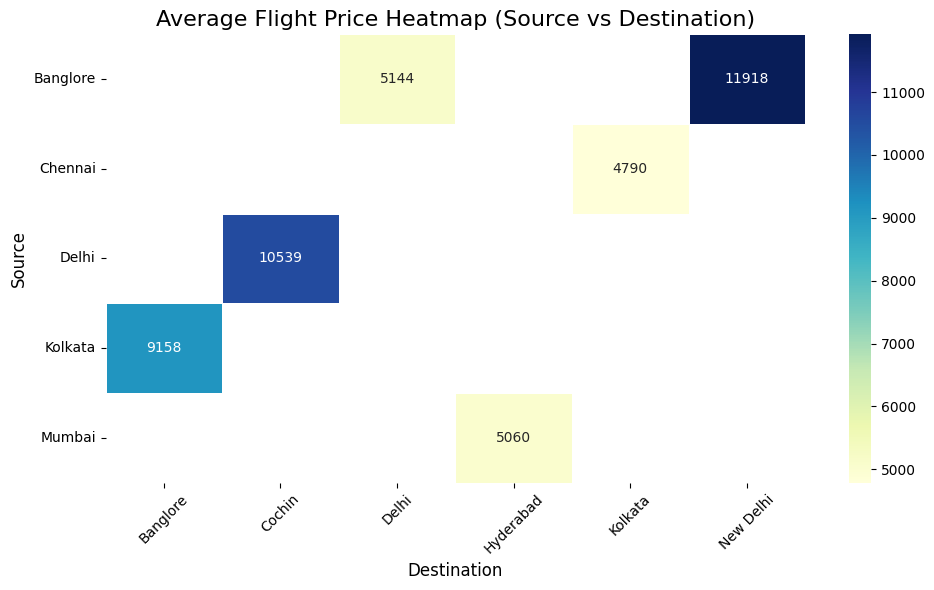

In [ ]:
heatmap_data = df.pivot_table(values='Price', index='Source', columns='Destination', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

# Add labels and title
plt.title('Average Flight Price Heatmap (Source vs Destination)', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-8-5c99bdddf7e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_price.index, y=airline_price.values, palette="viridis")


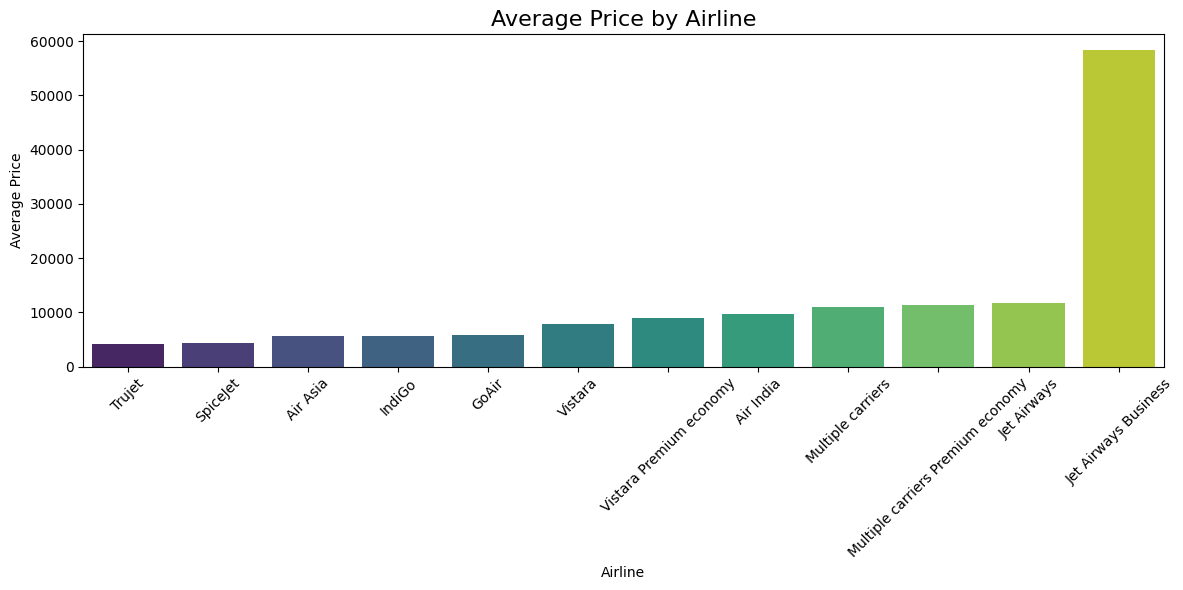

In [ ]:
plt.figure(figsize=(12, 6))
airline_price = df.groupby('Airline')['Price'].mean().sort_values()
sns.barplot(x=airline_price.index, y=airline_price.values, palette="viridis")
plt.title('Average Price by Airline', fontsize=16)
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-65e17f426598>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stops_price.index, y=stops_price.values, palette="plasma")


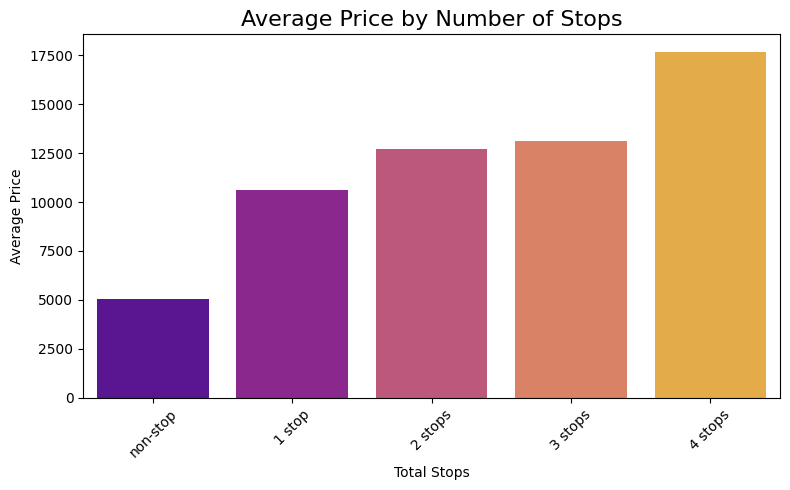

In [ ]:
plt.figure(figsize=(8, 5))
stops_price = df.groupby('Total_Stops')['Price'].mean().sort_values()
sns.barplot(x=stops_price.index, y=stops_price.values, palette="plasma")
plt.title('Average Price by Number of Stops', fontsize=16)
plt.ylabel('Average Price')
plt.xlabel('Total Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


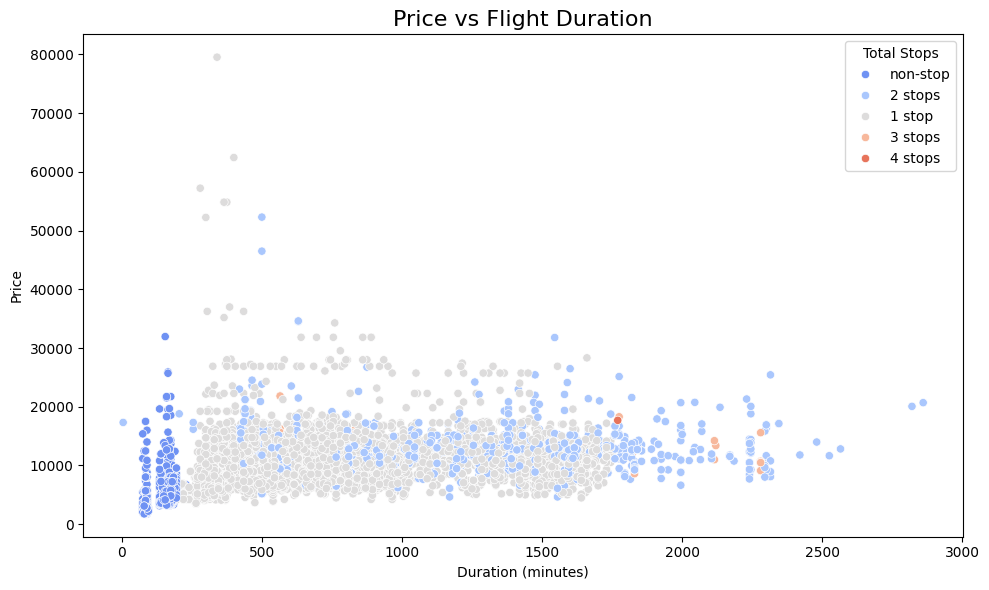

In [ ]:
# Convert Duration to minutes
def duration_to_mins(x):
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0].strip())
        if 'm' in x:
            m = int(x.split('h')[1].replace('m','').strip())
    elif 'm' in x:
        m = int(x.replace('m','').strip())
    return h * 60 + m

df['Duration_mins'] = df['Duration'].apply(duration_to_mins)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_mins', y='Price', data=df, hue='Total_Stops', palette='coolwarm')
plt.title('Price vs Flight Duration', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()


<ipython-input-11-fc068943fa23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='Set3')


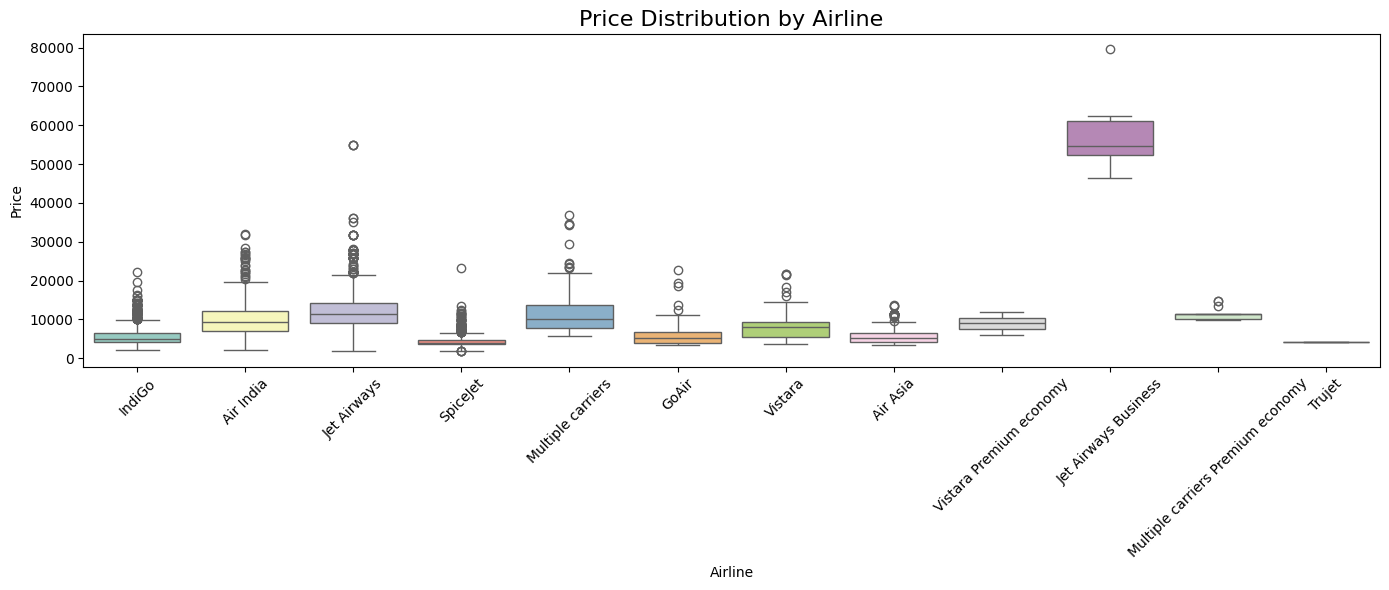

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Airline', y='Price', data=df, palette='Set3')
plt.title('Price Distribution by Airline', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
